In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso,  ElasticNet
from sklearn import ensemble
from sklearn import svm
from xgboost import XGBRegressor


from sklearn.model_selection import RandomizedSearchCV

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#import xgboost as xgb

In [60]:
#scoring_metric= 'neg_mean_squared_error'
scoring_metric= 'r2'
#scoring_metric = 'neg_mean_absolute_error'

In [61]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [62]:
# Load data
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [63]:
# Display first 5 rows
df.head()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
0,3 pokoje z zielonym tarasem i balkonem + MP,759000.0,"Maślice, Fabryczna, Wrocław, dolnośląskie",61.83,12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter,...,0,0,0,0,1,1,1,0,0,1
1,Maślicka 166 C | mieszkanie K2_2,616161.0,"ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...",67.71,9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter,...,0,0,0,1,0,0,0,0,0,0
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000.0,"Bezpieczna okolice, Różanka, Psie Pole, Wrocła...",57.70,9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4,...,1,0,0,0,1,1,0,0,0,0
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000.0,"ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...",40.00,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3,...,1,0,0,1,0,0,0,0,0,0
4,"Mieszkanie, 61 m², Wrocław",633000.0,"Tarnogaj, Krzyki, Wrocław, dolnośląskie",61.00,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2,...,0,0,0,0,0,0,0,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6645 non-null   object 
 1   prices                                      6645 non-null   float64
 2   location                                    6645 non-null   object 
 3   area                                        6645 non-null   float64
 4   price per square meter                      6645 non-null   int64  
 5   numbers_of_rooms                            6645 non-null   int64  
 6   urls                                        6645 non-null   object 
 7   property_ownership                          6645 non-null   object 
 8   condition_of_property                       6645 non-null   object 
 9   floor                                       6645 non-null   object 
 10  balcon_garde

In [65]:
# Get target vector
y = df['prices']


In [66]:
# Create list of columns to drop ( Columns will be dropped because are target, alle rows are the same or are not important for model e.g. urls)
column_to_drop = ["titles", "prices", "price per square meter", "location", "location_remain", "province", "city", "urls", "balcon_garden_terrace", "utilities", "security", "describe"]
column_to_drop

['titles',
 'prices',
 'price per square meter',
 'location',
 'location_remain',
 'province',
 'city',
 'urls',
 'balcon_garden_terrace',
 'utilities',
 'security',
 'describe']

In [67]:
# Select predictors
X = df[[cname for cname in df.columns if cname not in column_to_drop]]

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        6645 non-null   float64
 1   numbers_of_rooms                            6645 non-null   int64  
 2   property_ownership                          6645 non-null   object 
 3   condition_of_property                       6645 non-null   object 
 4   floor                                       6645 non-null   object 
 5   amount_of_rent                              2705 non-null   float64
 6   parking_space                               6645 non-null   object 
 7   type_of_heating                             6645 non-null   object 
 8   primary_secondary                           6645 non-null   object 
 9   seller                                      6645 non-null   object 
 10  year_of_cons

In [69]:
# Split data into training and validation data, for both predictors and target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [70]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object')

In [71]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_rolety_antywlamaniowe',
       'security_dummy_system_alarmowy', 'security_dummy_teren_zamkniety'],
      dtype='object')

In [72]:
# Check if all columns are selected
len(numerical_cols) + len(categorical_cols) == len(X_train.columns)

True

In [73]:
# Look at training data if everything is ok
X_train.sample(10)

,area,numbers_of_rooms,property_ownership,condition_of_property,floor,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
2379,52.00,2,Zapytaj,do zamieszkania,parter,600.0,garaż/miejsce parkingowe,gazowe,wtórny,biuro nieruchomości,...,1,0,0,0,1,1,0,1,0,0
35,64.30,3,pełna własność,Zapytaj,4,NaN,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
4816,27.00,1,pełna własność,do zamieszkania,2,360.0,Zapytaj,miejskie,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
2692,98.12,4,Zapytaj,Zapytaj,4,NaN,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
5957,56.76,3,pełna własność,do wykończenia,3,NaN,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
5406,36.10,1,pełna własność,do wykończenia,parter,NaN,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,...,0,0,0,1,0,0,0,0,0,0
4471,46.37,2,pełna własność,Zapytaj,3,NaN,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
4395,84.00,4,pełna własność,Zapytaj,1,1400.0,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
3617,57.00,2,spółdzielcze wł. prawo do lokalu,do zamieszkania,1,530.0,Zapytaj,miejskie,wtórny,prywatny,...,0,0,0,1,0,0,0,0,0,0
3278,38.05,1,pełna własność,do zamieszkania,1,163.0,Zapytaj,gazowe,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0


## Preprocessing

In [74]:
# Preprocessor for numerical data
numerical_transformer = Pipeline(steps=[
                                        ('imputer_num', SimpleImputer(strategy = 'mean')), #('imputer_num', SimpleImputer(strategy = 'constant')),
                                        ('std_scaler', StandardScaler())                   #/('normalizer', Normalizer())
                                        ])

In [75]:
# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
                                          ('imputer', SimpleImputer(strategy='constant', fill_value="missing")), #('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                          ])

In [76]:
# Bundle preprocessors for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [80]:
# Define 5 models to test
model_1 = LinearRegression()
model_2 = Ridge()
model_3 = DecisionTreeRegressor()
model_4 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_5 = XGBRegressor()
#models = [model_1, model_2, model_3, model_4, model_5]
models = [model_1, model_2, model_3, model_5]

In [81]:
# Define function for plotting results
def plot_valid_pred(y_valid, y_pred, start_index, plot_width):
    start_index = start_index
    plot_width = plot_width
    x_axis = pd.Series(range(start_index, start_index + plot_width, 1))
    y_valid_plot  = y_valid.iloc[:plot_width]
    y_valid_plot = y_valid_plot.reset_index(drop=True)
    y_pred_plot  = y_pred.iloc[:plot_width]
    y_pred_plot = y_pred_plot.reset_index(drop=True)    
    data_preproc = pd.DataFrame({"x_axis": x_axis,
                             "original": y_valid_plot ,
                             "predicted": y_pred_plot})
    sns.lineplot(x="x_axis", y='value', hue='variable', data = pd.melt(data_preproc, ['x_axis']))
    plt.show()    

In [82]:
# Define function for scoring models
def score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot: bool=False):
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_valid = pipeline.predict(X_valid)
    
    print("----------------------------", end="\n\n")
    pprint(model)
    print('\n\nMetrics for training set:')
    print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_train, y_pred_train)))
    print('MSE: '+ str(mean_squared_error(y_train, y_pred_train)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_train, y_pred_train))

    validation_result = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = scoring_metric)
    print('Cross-validation:', end="\n\n")
    print(f'Metric {scoring_metric} for Cross-validation on training set: ')
    print(validation_result)
    print("Mean: " + str(validation_result.mean()), end="\n\n")

    print('Metrics for validation set:')
    print('MAE: '+ str(mean_absolute_error(y_valid, y_pred_valid)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_valid, y_pred_valid)))
    print('MSE: '+ str(mean_squared_error(y_valid, y_pred_valid)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_valid, y_pred_valid), end="\n\n")
    

    if plot:
        y_pred_valid = pd.Series(y_pred_valid)
        plot_valid_pred(y_valid, y_pred_valid, 0, 100)
    
    print("----------------------------", end="\n\n")


----------------------------

LinearRegression()


Metrics for training set:
MAE: 63213.878474366866
MAPE: 0.09759663175929242
MSE: 7374353964.252969
Coefficient of determination r2: 0.76
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.76078886 0.70394523 0.7484144  0.72501835 0.76019912 0.73075435
 0.76173984 0.77651424 0.69761653 0.74862523]
Mean: 0.7413616157742565

Metrics for validation set:
MAE: 66955.90904634267
MAPE: 0.10508179919725893
MSE: 8807626741.904848
Coefficient of determination r2: 0.71



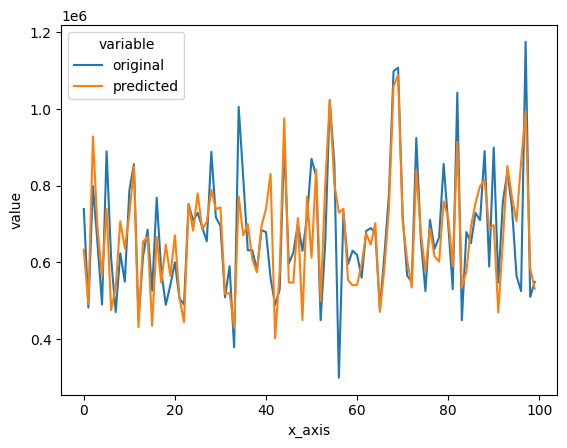

----------------------------

----------------------------

Ridge()


Metrics for training set:
MAE: 63445.05038921112
MAPE: 0.09797161738118033
MSE: 7395814327.069318
Coefficient of determination r2: 0.76
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.7646401  0.70478663 0.74928982 0.7261876  0.76090501 0.7322742
 0.76170603 0.77717871 0.69682994 0.75252458]
Mean: 0.742632260506987

Metrics for validation set:
MAE: 66818.28120312342
MAPE: 0.10489462857677401
MSE: 8755446679.100534
Coefficient of determination r2: 0.71



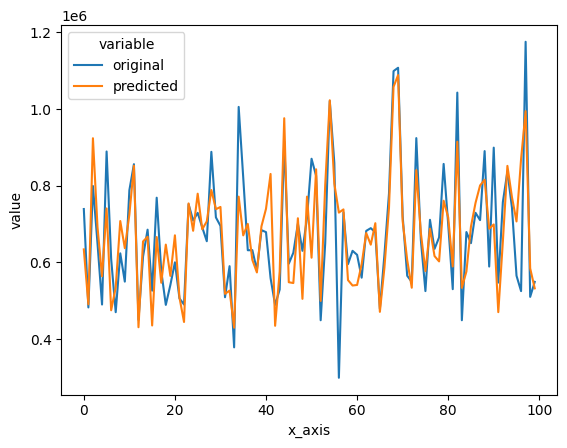

----------------------------

----------------------------

DecisionTreeRegressor()


Metrics for training set:
MAE: 155.70532029691734
MAPE: 0.00023484289397033894
MSE: 3098432.8625717936
Coefficient of determination r2: 1.00
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.62180298 0.65780084 0.63367267 0.64681104 0.63004773 0.64814509
 0.62676889 0.59752559 0.59889474 0.70225307]
Mean: 0.6363722641985925

Metrics for validation set:
MAE: 64114.17012074957
MAPE: 0.09897070007376459
MSE: 12062100598.257694
Coefficient of determination r2: 0.60



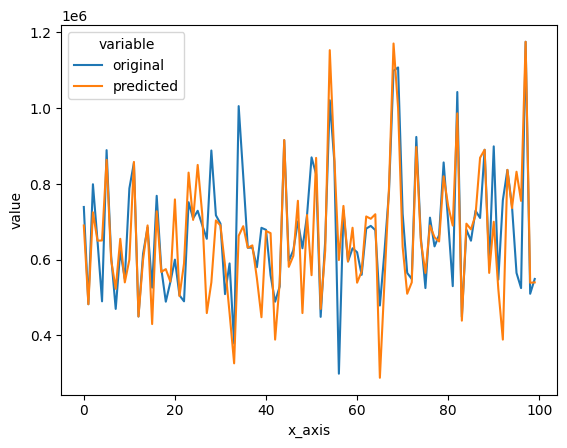

----------------------------

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Metrics for training set:
MAE: 24976.87811818096
MAPE: 0.03859163256418743
MSE: 1230005671.8001893
Coefficient of determination r2: 0.96
Cross-validation:

Metric r2 for Cross-validation on t

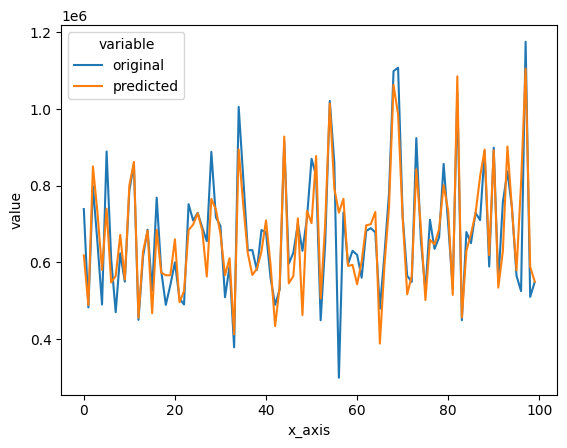

----------------------------



In [83]:
for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [48]:
# For:  categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]


----------------------------

LinearRegression()
Zbiór treningowy:
MAE: 67135.46069954989
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 95477731674587.53
Coefficient of determination r2: -150729680910868905984.00
----------------------------

----------------------------

Ridge()
Zbiór treningowy:
MAE: 67101.82673745905
Coefficient of determination r2: 0.73
Zbiór walidacyjny:
MAE: 64498.93560385134
Coefficient of determination r2: 0.74
----------------------------

----------------------------

DecisionTreeRegressor()
Zbiór treningowy:
MAE: 823.2741448755045
Coefficient of determination r2: 1.00
Zbiór walidacyjny:
MAE: 63856.102586109555
Coefficient of determination r2: 0.62
----------------------------

----------------------------

RandomForestRegressor(criterion='absolute_error', random_state=0)
Zbiór treningowy:
MAE: 19573.21512577832
Coefficient of determination r2: 0.97
Zbiór walidacyjny:
MAE: 47595.11695438531
Coefficient of determination r2: 0.82
----------------------------

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Zbiór treningowy:
MAE: 25274.937801481625
Coefficient of determination r2: 0.96
Zbiór walidacyjny:
MAE: 51061.00277736132
Coefficient of determination r2: 0.81
----------------------------


SyntaxError: invalid syntax (1500726110.py, line 4)

# 1. LinearRegression()

In [84]:
model = LinearRegression()

In [85]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

----------------------------

LinearRegression()


Metrics for training set:
MAE: 63213.878474366866
MAPE: 0.09759663175929242
MSE: 7374353964.252969
Coefficient of determination r2: 0.76
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.76078886 0.70394523 0.7484144  0.72501835 0.76019912 0.73075435
 0.76173984 0.77651424 0.69761653 0.74862523]
Mean: 0.7413616157742565

Metrics for validation set:
MAE: 66955.90904634267
MAPE: 0.10508179919725893
MSE: 8807626741.904848
Coefficient of determination r2: 0.71



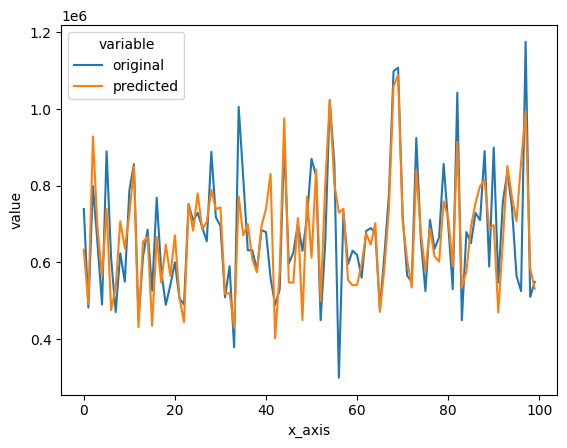

----------------------------



In [86]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [87]:
parameters_grid = {'model__fit_intercept':[True, False]}


In [88]:
grid_cv_model = GridSearchCV(pipeline, parameters_grid, cv=5, scoring= scoring_metric).fit(X_train, y_train)


In [91]:
grid_cv_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [92]:
print(grid_cv_model.best_score_)

0.7402119252824072


In [93]:
print(grid_cv_model.best_params_)

{'model__fit_intercept': True}


In [94]:
best_param_dict = grid_cv_model.best_params_
best_param_dict

{'model__fit_intercept': True}

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_du...
                                                                         Index(['property_ownership', 'condition_o

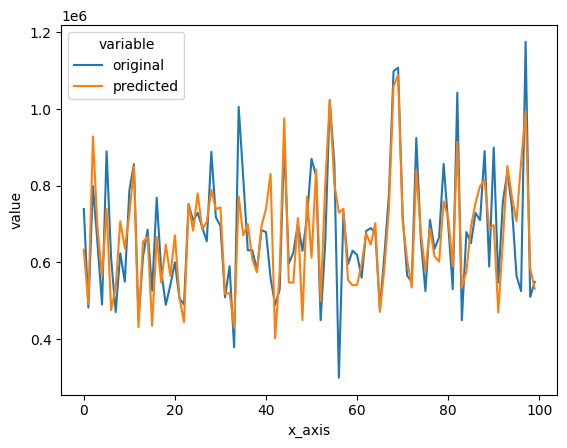

----------------------------



In [95]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

# 2. Ridge()

In [96]:
model = Ridge()

In [97]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

Ridge()


Metrics for training set:
MAE: 63445.05038921112
MAPE: 0.09797161738118033
MSE: 7395814327.069318
Coefficient of determination r2: 0.76
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.7646401  0.70478663 0.74928982 0.7261876  0.76090501 0.7322742
 0.76170603 0.77717871 0.69682994 0.75252458]
Mean: 0.742632260506987

Metrics for validation set:
MAE: 66818.28120312342
MAPE: 0.10489462857677401
MSE: 8755446679.100534
Coefficient of determination r2: 0.71



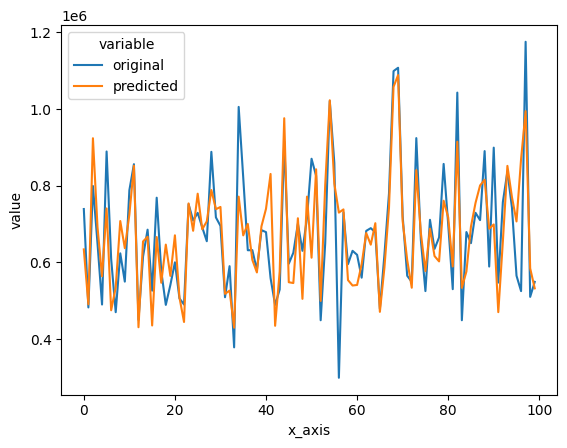

----------------------------



In [98]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

# GridSearchCV for Ridge

In [114]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ],
                   #'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
                   }

In [115]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [116]:
grid_cv_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object'))])),
                ('model', Ridge(alpha=10.0))])

In [117]:
print(grid_cv_model.best_score_)

0.742709096322157


In [118]:
print(grid_cv_model.best_params_)

{'model__alpha': 10.0}


----------------------------

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_owne

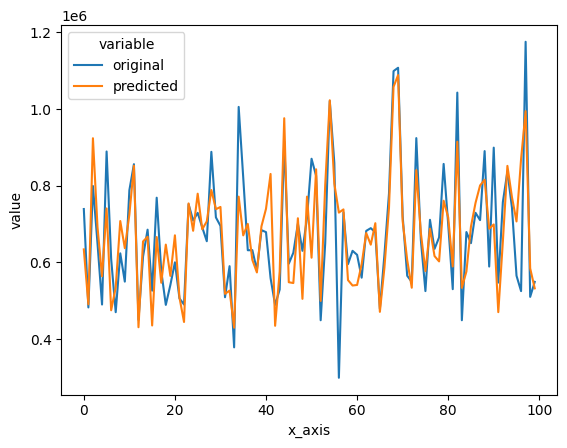

----------------------------



In [119]:
score_model(grid_cv_model.best_estimator_, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [120]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068228,0.004131,0.007773,0.000396,0.000001,{'model__alpha': 1e-06},0.729538,0.735111,0.745972,0.768065,...,0.740218,0.015913,26,0.763700,0.760128,0.759489,0.754171,0.765159,0.760530,0.003825
1,0.065625,0.004571,0.007386,0.000494,0.00001,{'model__alpha': 1e-05},0.729568,0.735122,0.745956,0.768113,...,0.740229,0.015927,25,0.763700,0.760128,0.759490,0.754170,0.765160,0.760530,0.003826
2,0.073985,0.012021,0.008178,0.000746,0.0001,{'model__alpha': 0.0001},0.729523,0.735127,0.745951,0.768065,...,0.740212,0.015914,27,0.763701,0.760128,0.759490,0.754171,0.765160,0.760530,0.003825
3,0.068008,0.005096,0.007788,0.000743,0.001,{'model__alpha': 0.001},0.729577,0.735128,0.745978,0.768066,...,0.740233,0.015904,24,0.763700,0.760128,0.759489,0.754171,0.765160,0.760530,0.003825
4,0.067219,0.001739,0.008178,0.000747,0.01,{'model__alpha': 0.01},0.729630,0.735142,0.745972,0.768125,...,0.740263,0.015909,23,0.763699,0.760128,0.759490,0.754170,0.765160,0.760529,0.003826


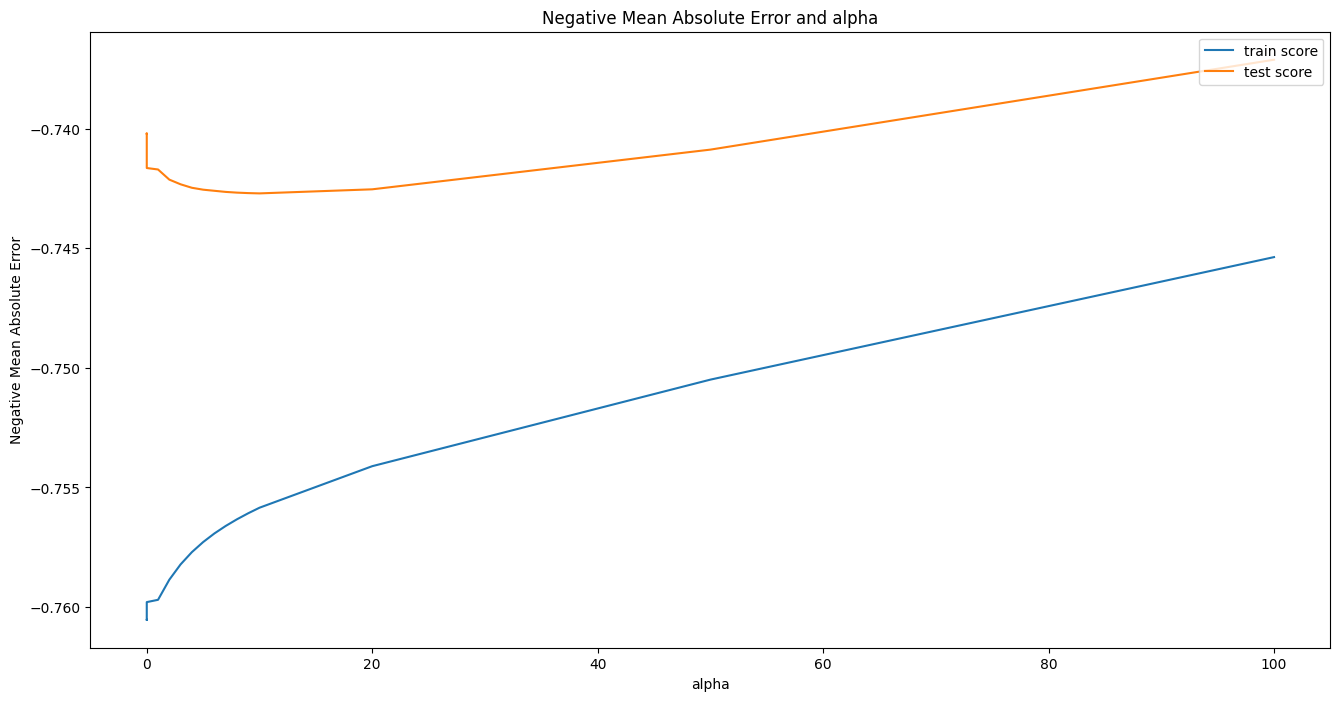

,mean_train_score,mean_test_score
0,-0.760530,-0.740218
1,-0.760530,-0.740229
2,-0.760530,-0.740212
3,-0.760530,-0.740233
4,-0.760529,-0.740263
5,-0.760523,-0.740403
6,-0.760505,-0.740528
7,-0.760448,-0.740780
8,-0.760371,-0.740985
9,-0.760281,-0.741147


In [121]:
# change datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
cv_results['mean_test_score'] = cv_results['mean_test_score'].apply(lambda x: -x)
cv_results['mean_train_score'] = cv_results['mean_train_score'].apply(lambda x: -x)

cv_results[['mean_train_score', 'mean_test_score']]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()
cv_results[['mean_train_score', 'mean_test_score']]

# 3.Lasso()

In [122]:
model = Lasso()

In [123]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7359338275223.014, tolerance: 16254837505.846558
  model = cd_fast.sparse_enet_coordinate_descent(


----------------------------

Lasso()


Metrics for training set:
MAE: 63237.06954170078
MAPE: 0.09763518691951549
MSE: 7374553911.232917
Coefficient of determination r2: 0.76


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6680497271972.658, tolerance: 14713417654.046494
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6446797741819.283, tolerance: 14563950084.821688
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7298858679972.07, tolerance: 14659385137.630428
  model = cd_fast.sparse_enet_coordinate_desce

Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.76123032 0.70380561 0.74859045 0.72510942 0.76009451 0.73090936
 0.76138361 0.77688436 0.69774333 0.74884247]
Mean: 0.741459344070859

Metrics for validation set:
MAE: 66942.0599521246
MAPE: 0.10505758883529645
MSE: 8804390736.556553
Coefficient of determination r2: 0.71



C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6569153277437.381, tolerance: 14537207618.313879
  model = cd_fast.sparse_enet_coordinate_descent(


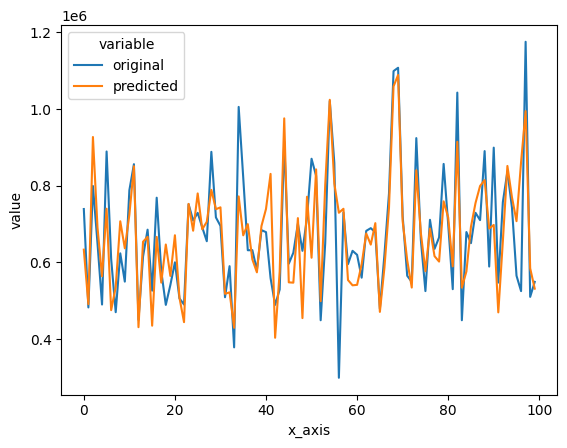

----------------------------



In [124]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [135]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [136]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)
grid_cv_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5288088901039.479, tolerance: 13022456389.94534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8819785935008.02, tolerance: 13070994535.199984
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8725848318691.559, tolerance: 12907052622.282103
  model = cd_fast.sparse_enet_coordinate_descen

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_du...
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object'))])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                          0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                          5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                          100, 500, 1000]},
             return_train_score=True, verbose=1)

In [137]:
pprint(grid_cv_model.cv_results_)

{'mean_fit_time': array([1.67850599, 1.66475582, 1.6581543 , 1.66534176, 1.66892738,
       1.6649437 , 1.66754422, 1.65337944, 1.65954051, 1.6601501 ,
       1.64520669, 1.65018177, 1.65717525, 1.64938936, 1.64680214,
       1.64559875, 1.50576692, 1.52951851, 1.5424777 , 1.5247169 ,
       1.53070297, 1.54128156, 1.52651291, 1.47046814, 1.47206922,
       1.12519898, 0.45119843, 0.2439404 , 0.08778114, 0.07140245]),
 'mean_score_time': array([0.00799108, 0.00777712, 0.0077858 , 0.00778098, 0.00798092,
       0.00797725, 0.00778046, 0.00778608, 0.00739803, 0.00798955,
       0.00758443, 0.00777826, 0.00777874, 0.00777941, 0.0077795 ,
       0.00798092, 0.00778666, 0.00776701, 0.0079845 , 0.00777235,
       0.00778947, 0.00777788, 0.00778418, 0.00718141, 0.00778027,
       0.00797758, 0.00757694, 0.00758033, 0.00737133, 0.00718603]),
 'mean_test_score': array([0.74020022, 0.74020022, 0.74020023, 0.7402003 , 0.74020115,
       0.74020596, 0.74021201, 0.74022702, 0.74024425, 0.74026182,


In [128]:
print(grid_cv_model.best_score_)

0.742413969169543


In [129]:
print(grid_cv_model.best_params_)

{'model__alpha': 50}


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7359338275223.014, tolerance: 16254837505.846558
  model = cd_fast.sparse_enet_coordinate_descent(


----------------------------

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_owne

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6680497271972.658, tolerance: 14713417654.046494
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6446797741819.283, tolerance: 14563950084.821688
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7298858679972.07, tolerance: 14659385137.630428
  model = cd_fast.sparse_enet_coordinate_desce

Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.76123032 0.70380561 0.74859045 0.72510942 0.76009451 0.73090936
 0.76138361 0.77688436 0.69774333 0.74884247]
Mean: 0.741459344070859

Metrics for validation set:
MAE: 66942.0599521246
MAPE: 0.10505758883529645
MSE: 8804390736.556553
Coefficient of determination r2: 0.71



C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6569153277437.381, tolerance: 14537207618.313879
  model = cd_fast.sparse_enet_coordinate_descent(


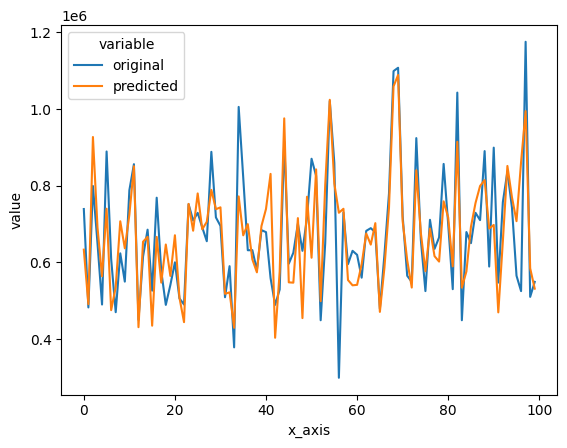

----------------------------



In [132]:
#score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)
score_model(grid_cv_model.best_estimator_, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [138]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.678506,0.025428,0.007991,0.000014,0.000001,{'model__alpha': 1e-06},0.729529,0.735215,0.745819,0.768086,...,0.740200,0.015915,28,0.763702,0.76013,0.759491,0.754172,0.765162,0.760531,0.003826
1,1.664756,0.027714,0.007777,0.000384,0.00001,{'model__alpha': 1e-05},0.729529,0.735215,0.745819,0.768086,...,0.740200,0.015915,27,0.763702,0.76013,0.759491,0.754172,0.765162,0.760531,0.003826
2,1.658154,0.023659,0.007786,0.000402,0.0001,{'model__alpha': 0.0001},0.729529,0.735215,0.745819,0.768086,...,0.740200,0.015915,26,0.763702,0.76013,0.759491,0.754172,0.765162,0.760531,0.003826
3,1.665342,0.027653,0.007781,0.000400,0.001,{'model__alpha': 0.001},0.729529,0.735215,0.745819,0.768086,...,0.740200,0.015915,25,0.763702,0.76013,0.759491,0.754172,0.765162,0.760531,0.003826
4,1.668927,0.019866,0.007981,0.000022,0.01,{'model__alpha': 0.01},0.729530,0.735216,0.745821,0.768086,...,0.740201,0.015915,24,0.763702,0.76013,0.759491,0.754172,0.765162,0.760531,0.003826


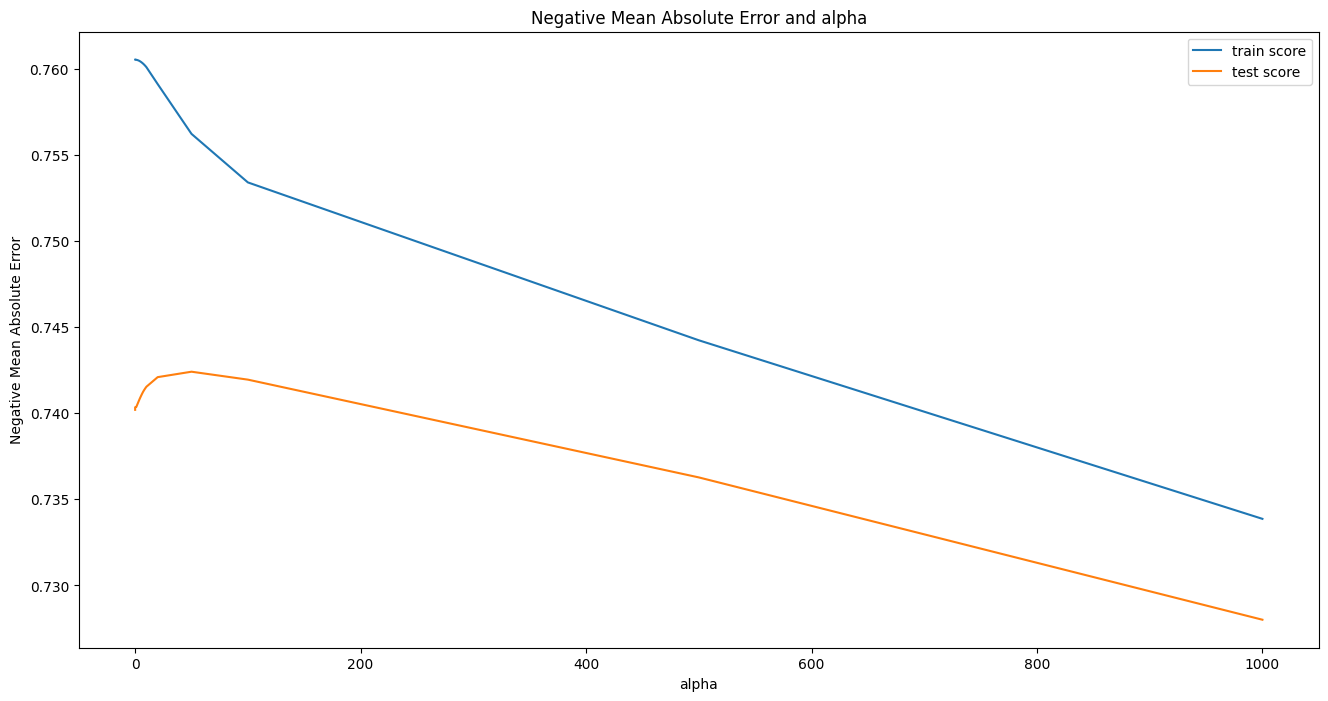

In [139]:
# Convert datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

#cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

# 4.  ElasticNet()

In [140]:
model = ElasticNet() 

In [141]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

ElasticNet()


Metrics for training set:
MAE: 79974.48215883614
MAPE: 0.1260670122931061
MSE: 11224539001.350048
Coefficient of determination r2: 0.63
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.63871603 0.60326639 0.65004967 0.63539481 0.64291762 0.60589583
 0.63821804 0.66243499 0.57588409 0.63787352]
Mean: 0.629065098345106

Metrics for validation set:
MAE: 83135.60531881206
MAPE: 0.13205216105507786
MSE: 12617870514.443415
Coefficient of determination r2: 0.58



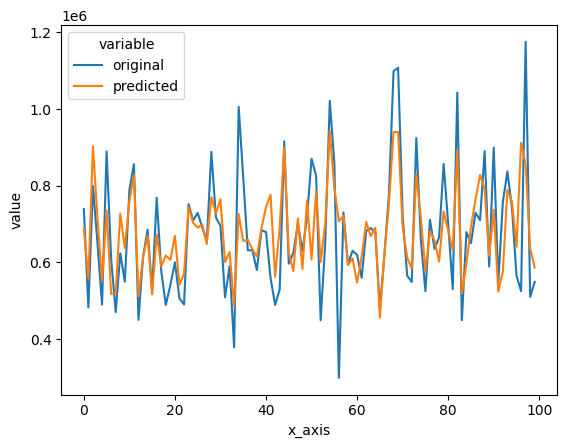

----------------------------



In [142]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [143]:
parameters_grid = {'model__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [146]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15386494275012.658, tolerance: 13022456389.94534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15677089016611.896, tolerance: 13070994535.199984
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15521838887059.514, tolerance: 12907052622.282103
  model = cd_fast.sparse_enet_coordinate_de

In [153]:
print(grid_cv_model.best_score_)

0.7424983197612033


In [154]:
print(grid_cv_model.best_params_)

{'model__alpha': 0.01}


In [155]:
grid_cv_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object'))])),
                ('model', ElasticNet(alpha=0.01))])

----------------------------

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_owne

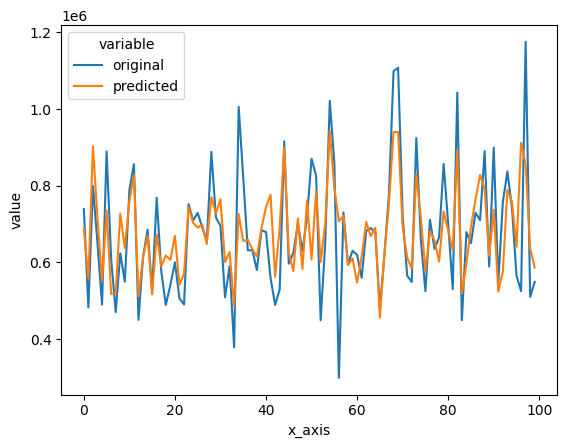

----------------------------



In [156]:
score_model(grid_cv_model.best_estimator_, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [157]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.680701,0.039420,0.007994,0.000012,0.000001,{'model__alpha': 1e-06},0.729554,0.735218,0.745838,0.768094,...,0.740214,0.015912,5,0.763702,0.760130,0.759491,0.754172,0.765162,0.760531,0.003826
1,1.671343,0.026371,0.007783,0.000392,0.00001,{'model__alpha': 1e-05},0.729718,0.735240,0.745932,0.768140,...,0.740304,0.015884,4,0.763701,0.760129,0.759490,0.754171,0.765160,0.760530,0.003826
2,1.581579,0.038298,0.007585,0.000491,0.0001,{'model__alpha': 0.0001},0.730618,0.735545,0.746288,0.768329,...,0.740814,0.015658,3,0.763590,0.760078,0.759400,0.754085,0.765056,0.760442,0.003816
3,1.584365,0.021898,0.007784,0.000740,0.001,{'model__alpha': 0.001},0.732398,0.737111,0.747378,0.768806,...,0.742172,0.015144,2,0.761673,0.758900,0.757659,0.752433,0.763198,0.758772,0.003727
4,1.475061,0.401526,0.007585,0.000493,0.01,{'model__alpha': 0.01},0.732245,0.739654,0.746454,0.769423,...,0.742498,0.015297,1,0.756764,0.754412,0.752661,0.747605,0.758224,0.753933,0.003696


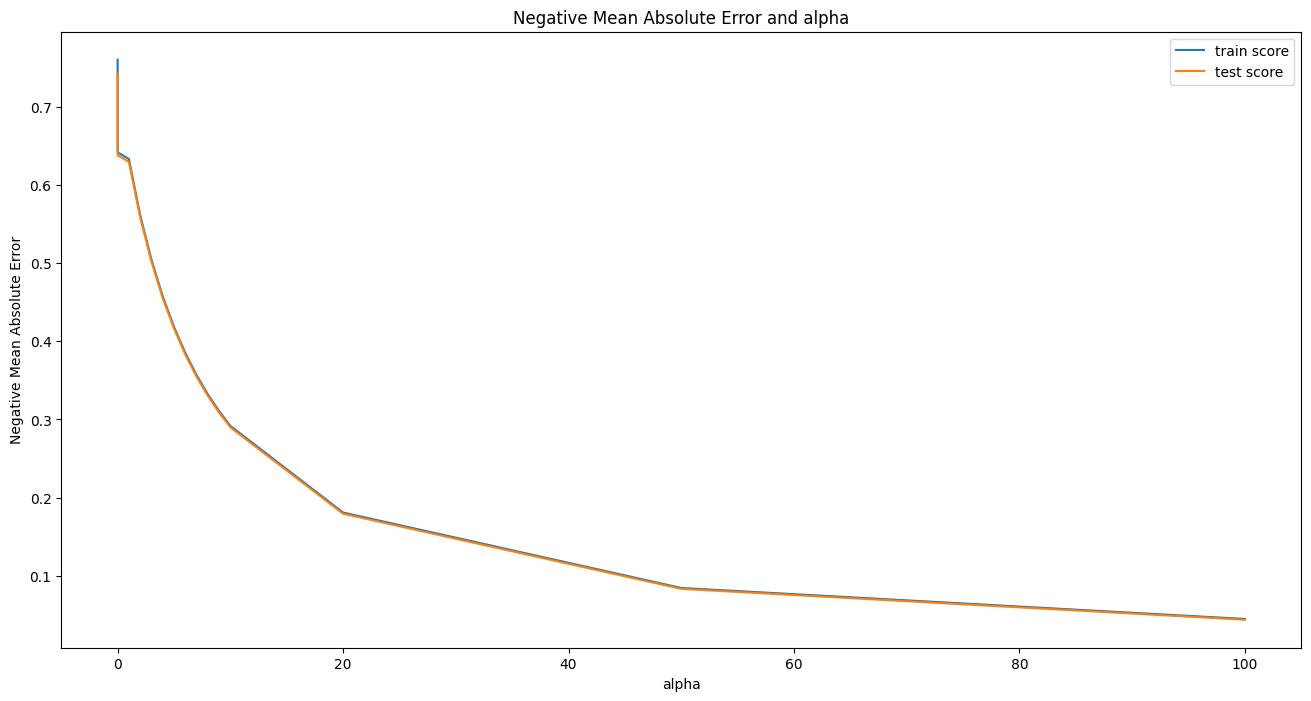

In [158]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_model__alpha'].astype('int32')

cv_results = cv_results[cv_results['param_model__alpha']<=200]
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

# 5. DecisionTreeRegressor()

In [159]:
model = DecisionTreeRegressor()

In [160]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

DecisionTreeRegressor()


Metrics for training set:
MAE: 155.70532029691734
MAPE: 0.00023484289397033894
MSE: 3098432.8625717936
Coefficient of determination r2: 1.00
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.62535738 0.6297137  0.64116238 0.62308746 0.65192915 0.64769404
 0.66721405 0.56446153 0.60509828 0.67980522]
Mean: 0.633552322227014

Metrics for validation set:
MAE: 64080.687839764956
MAPE: 0.09842216791021981
MSE: 11938233145.371626
Coefficient of determination r2: 0.61



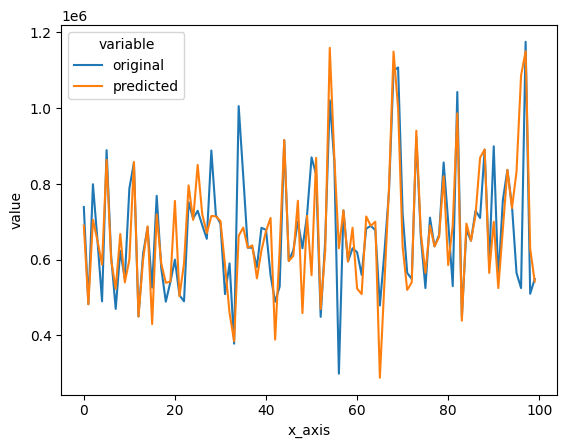

----------------------------



In [161]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [162]:
parameters_grid ={"model__splitter":["best","random"],
                  "model__max_depth" : [3,4,5,6], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__min_samples_leaf":[1,2,3,4,5,6,10],#"model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__max_features":["auto","log2","sqrt",None],
                  "model__max_leaf_nodes":[None,10,20] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [163]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

In [164]:
grid_cv_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_depth=4, max_features='auto',
                                       min_weight_fraction_leaf=0.1))])

In [165]:
print(grid_cv_model.best_score_)

0.569066541323814


In [166]:
print(grid_cv_model.best_params_)

{'model__max_depth': 4, 'model__max_features': 'auto', 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 1, 'model__min_weight_fraction_leaf': 0.1, 'model__splitter': 'best'}


----------------------------

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',

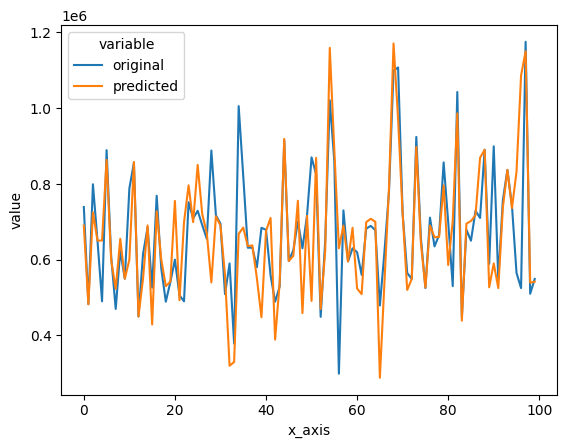

----------------------------



In [167]:
score_model(grid_cv_model.best_estimator_, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [168]:
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__max_leaf_nodes,param_model__min_samples_leaf,param_model__min_weight_fraction_leaf,param_model__splitter,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035109,0.002476,0.007781,0.000386,3,auto,None,1,0.1,best,...,0.560993,0.021343,127,0.568652,0.560237,0.567636,0.557037,0.579033,0.566519,0.007639
1,0.032103,0.001708,0.007985,0.000886,3,auto,None,1,0.1,random,...,0.294389,0.155356,888,0.532808,0.064742,0.347165,0.330054,0.198534,0.294661,0.156733
2,0.030731,0.001715,0.007569,0.000477,3,auto,None,1,0.2,best,...,0.518005,0.025923,169,0.528350,0.519164,0.523050,0.512510,0.531684,0.522952,0.006764
3,0.031115,0.000739,0.007786,0.000747,3,auto,None,1,0.2,random,...,0.182483,0.164094,1075,0.057628,0.438403,0.048430,0.247775,0.076250,0.173697,0.151140
4,0.027532,0.001198,0.007780,0.000978,3,auto,None,1,0.3,best,...,0.388905,0.021703,475,0.400395,0.392262,0.400533,0.392050,0.403904,0.397829,0.004800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0.032308,0.001859,0.008583,0.000483,6,None,20,10,0.2,random,...,0.252692,0.122995,931,0.071184,0.309348,0.224006,0.379941,0.310166,0.258929,0.106093
2684,0.026728,0.001167,0.007187,0.000411,6,None,20,10,0.3,best,...,0.388905,0.021703,475,0.400395,0.392262,0.400533,0.392050,0.403904,0.397829,0.004800
2685,0.026926,0.000625,0.007586,0.000491,6,None,20,10,0.3,random,...,0.022284,0.006564,1953,0.020314,0.022993,0.024734,0.023745,0.024210,0.023199,0.001552
2686,0.025729,0.000398,0.007382,0.000497,6,None,20,10,0.4,best,...,0.388905,0.021703,475,0.400395,0.392262,0.400533,0.392050,0.403904,0.397829,0.004800


In [170]:
pprint(cv_results)

      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.035109      0.002476         0.007781        0.000386   
1          0.032103      0.001708         0.007985        0.000886   
2          0.030731      0.001715         0.007569        0.000477   
3          0.031115      0.000739         0.007786        0.000747   
4          0.027532      0.001198         0.007780        0.000978   
...             ...           ...              ...             ...   
2683       0.032308      0.001859         0.008583        0.000483   
2684       0.026728      0.001167         0.007187        0.000411   
2685       0.026926      0.000625         0.007586        0.000491   
2686       0.025729      0.000398         0.007382        0.000497   
2687       0.025327      0.000484         0.007570        0.000481   

     param_model__max_depth param_model__max_features  \
0                         3                      auto   
1                         3                  

# 6. RandomForestRegressor()

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

----------------------------

RandomForestRegressor(n_estimators=50, random_state=0)

Metrics for training set:
MAE: 18567.837925809446
MAPE: 0.028149348556356552
MSE: 817146622.9241788
Coefficient of determination r2: 0.97
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.82956327 0.78972911 0.81534797 0.81495059 0.83084589 0.82324977
 0.80133152 0.82606839 0.78094081 0.79501481]
Mean: 0.810704213228501

Metrics for validation set:
MAE: 50047.906613929656
MAPE: 0.07720786947844686
MSE: 6236507100.857997
Coefficient of determination r2: 0.79



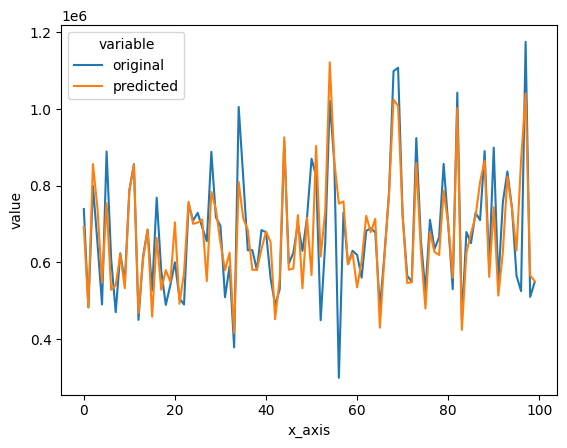

----------------------------



In [ ]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [ ]:
parameters_grid ={"model__bootstrap":[True],
                  "model__n_jobs" : [-1],
                  "model__max_depth" : [2, 4, 6], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__n_estimators" : [10,50,100],
                  "model__min_samples_split":[1, 2, 3],#"model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__min_weight_fraction_leaf":[0.0, 0.3],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__max_features":[1, "sqrt"],
                  "model__min_samples_leaf":[1, 2, 4] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [ ]:
grid_cv_model = GridSearchCV(pipeline, 
                      parameters_grid,
                      scoring= scoring_metric,
                      cv=5,
                      return_train_score=True,
                      verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Li

In [ ]:
grid_cv_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
                                                                          'balcon_garden_terrace_dummy_Zapytaj',
                                                                          'balcon_garden_terrace_dummy_balkon',
                                                                          'balcon_gard...
                                                              random_state=0))]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [2, 4, 6],
                         'model__max_features': [1, 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [1, 2, 3],
                         'model__min_weight_fraction_leaf': [0.0, 0.3],
                         'model__n_estimators': [10, 50, 100],
                         'model__n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
print(grid_cv_model.best_score_)

-95519.24701401463


In [ ]:
print(grid_cv_model.best_params_)

{'model__bootstrap': True, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 3, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 10, 'model__n_jobs': -1}


In [ ]:
score_model(grid_cv_model, pipeline, X_train, y_train, X_valid, y_valid)

----------------------------

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['area',
                                                                          'numbers_of_rooms',
                                                                          'amount_of_rent',
                                                                          'number_of_floors',
      

# 6. XGBRegressor()

In [177]:
model = XGBRegressor()

In [178]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

----------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Metrics for training set:
MAE: 24976.87811818096
MAPE: 0.03859163256418743
MSE: 1230005671.8001893
Coefficient of determination r2: 0.96
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.84318918 0.76

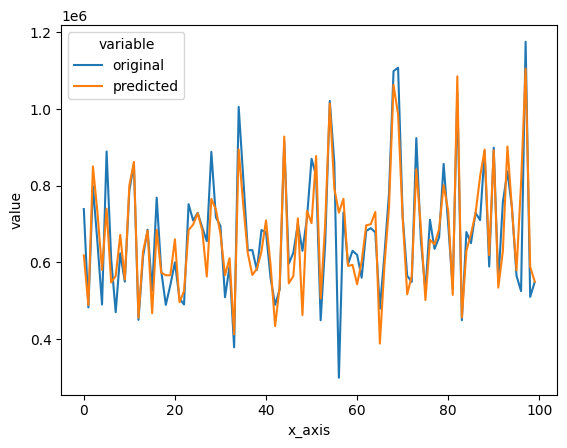

----------------------------



In [179]:
score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

In [182]:
parameters_grid ={"model__learning_rate":[ .06, .07, .08, .09],
                  "model__n_jobs" : [-1],
                  "model__max_depth" : [ 7, 8, 9, 10, 15, 20], #"model__max_depth" : [1,3,5,7,9,11,12],
                  "model__min_child_weight" : [.001, .005, .01, .015, .1, 1],
                  "model__max_leaves" : [0, 1, 10, 100, 200, 1000, 10000 ],
                  "model__min_split_loss" : [None, 10, 100, 500, 1000, 1500, 2000, 10000],
                  "model__sampling_method" : ["uniform", "gradient_based"],
                  "model__booster" : ["gbtree", "gblinear"],
                  "model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                  "model__subsample":[.01, .1, .5, .7, .75, 0.8, .85, 1],#"model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  "model__colsample_bytree":[ .7, .75, .8, .85,  1],
                  "model__n_estimators":[500, 550, 600, 650, 700, 800] } #"model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [183]:
rs_model=RandomizedSearchCV(pipeline, param_distributions=parameters_grid, n_iter=1000, n_jobs=-1, cv=3, verbose=1)

In [184]:
rs_model.fit(X_train,y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
672 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terr...
                                        'model__min_child_weight': [0.001,
                                                                    0.005, 0.01,
                                                                    0.015, 0.1,
                                                                    1],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_split_loss': [None, 10, 100,
                                                                  500, 1000,
                                                                  1500, 2000,
                                                                  10000],
                                        'model__n_estimators': [500, 550, 600,
                                                                650, 700, 800],
                                        'model__n_jobs': [-1],
                                        'model__sampling_method': ['uniform',
                                                                   'gradient_based'],
                                        'model__subsample': [0.01, 0.1, 0.5,
                                                             0.7, 0.75, 0.8,
                                                             0.85, 1]},
                   verbose=1)

In [185]:
print(rs_model.best_score_)

0.82605965576728


In [186]:
print(rs_model.best_params_)

{'model__subsample': 0.8, 'model__sampling_method': 'uniform', 'model__n_jobs': -1, 'model__n_estimators': 650, 'model__min_split_loss': 1000, 'model__min_samples_leaf': 8, 'model__min_child_weight': 0.015, 'model__max_leaves': 100, 'model__max_depth': 15, 'model__learning_rate': 0.07, 'model__colsample_bytree': 0.75, 'model__booster': 'gbtree'}


In [187]:
rs_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=15, max_leaves=100,
                              min_child_weight=0.015, min_samples_leaf=8,
                              min_split_loss=1000, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=650, n_jobs=-1, ...))])

----------------------------

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, ma

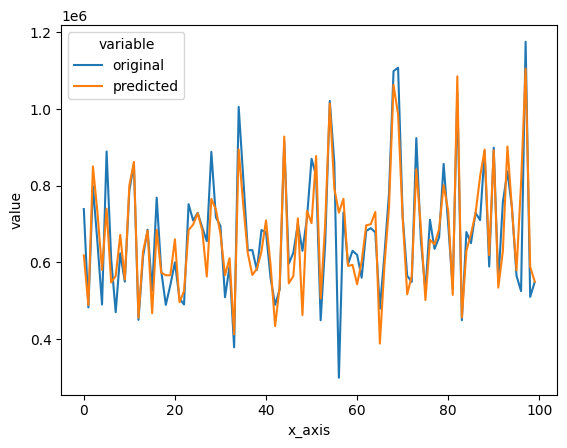

----------------------------



In [188]:
score_model(rs_model.best_estimator_, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)